### 2. Numerical solutions to ODEs

Euler's method : $x_{i+1} = x_{i} + f(x_{i}; t_{i})dt$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_timeline(t_max, dt):
    return np.arange(0, t_max, dt)

#### 2 (a) Define a Python function that takes as an argument the function f(x; t), the initial condition, the stop time, and the integration step $\delta$t

In [3]:
def euler(f_func, x_0, t_max, dt):
    t = get_timeline(t_max, dt)
    x = np.zeros(len(t))
    x[0] = x_0
    for i in range(len(t)-1):
        x[i+1] = x[i] + f_func(x[i], t[i])*dt
    return x

#### 2 (b) Solve the problems from Exercise 1 with the Euler method. Plot and compare (discuss) the analytical and numerical solutions.

In [4]:
def first(x,t) :
    return -x

def second(x,t) :
    return x**(-1)

def third(x,t) :
    return 1-x

def logistic(x,t) :
    return x*(1 - x)

In [5]:
def first_analytical(t) :
    return np.exp(-t)

def second_analytical(t) :
    return np.sqrt(2*t + 1)

def third_analytical(t) :
    return 1 - np.exp(-t)

def logistic_analytical(t) :
    return 1/(1 + np.exp(-t))

In [6]:
prob_i_euler = euler(first, 1, 5, .01)
prob_ii_euler = euler(second, 1, 5, .01)
prob_iii_euler = euler(third, 0, 5, .01)
prob_iv_euler = euler(logistic, 0.5, 5, .01)

In [7]:
t = get_timeline(5, 0.01) # keeping it same as euler

prob_i_analytical = first_analytical(t)
prob_ii_analytical = second_analytical(t)
prob_iii_analytical = third_analytical(t)
prob_iv_analytical = logistic_analytical(t)

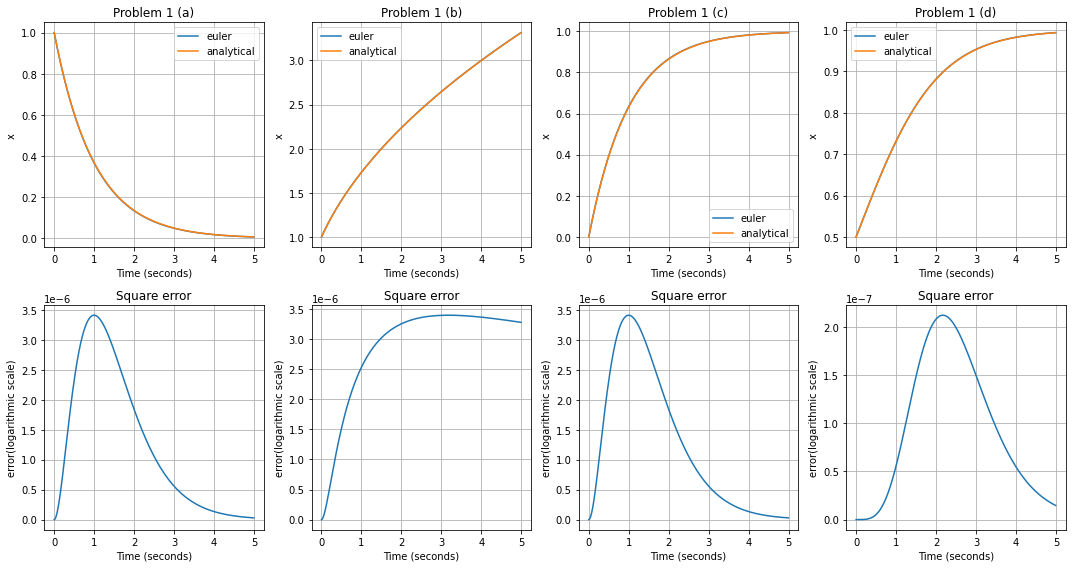

In [8]:
#plotting and comparing

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

different_functons = [
    { 'euler_func':prob_i_euler, 'analy_func' : prob_i_analytical, 'label': 'Problem 1 (a)'},
    { 'euler_func':prob_ii_euler, 'analy_func' : prob_ii_analytical, 'label': 'Problem 1 (b)'},
    { 'euler_func':prob_iii_euler, 'analy_func' : prob_iii_analytical, 'label': 'Problem 1 (c)'},
    { 'euler_func':prob_iv_euler, 'analy_func' : prob_iv_analytical, 'label': 'Problem 1 (d)'}
]



for i in range(4) :
    function = different_functons[i]
    axes[0][i].plot(t,function['euler_func'], label='euler')
    axes[0][i].plot(t,function['analy_func'], label='analytical')
    axes[0][i].set_title(function['label'])
    axes[0][i].set_ylabel('x')
    axes[0][i].set_xlabel('Time (seconds)')
    axes[0][i].grid()
    axes[0][i].legend()
    
    axes[1][i].plot(t,np.square(function['euler_func'] - function['analy_func']))
    axes[1][i].set_title('Square error')
    axes[1][i].set_ylabel('error(logarithmic scale)')
    axes[1][i].set_xlabel('Time (seconds)')
    axes[1][i].grid()
    

fig.tight_layout()

The Euler method works as analytical solution with small square error (ranging in $ln^{-6}$)

#### 2 (c) Compare the results obtained by the Euler method with a more advanced numerical method (see the scipy.integrate package, e.g. a Runge-Kutta method).

In [9]:
def runge_kutta(f_func, x_0, t) :
    return integrate.odeint(f_func, x_0, t).ravel()

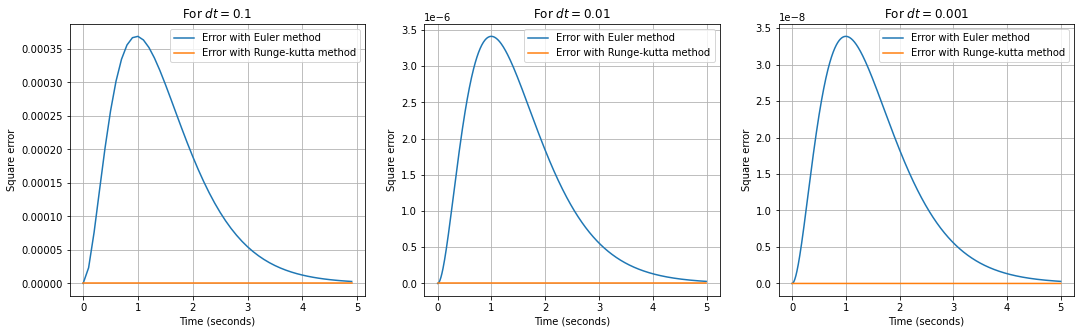

In [10]:
from scipy import integrate
x_0 = 1
t_max = 5
dt_arary = np.array([0.1, 0.01, 0.001])

fig, axes = plt.subplots(nrows=1, ncols=len(dt_arary), figsize=(18, 5))

for i in range(len(dt_arary)) :
    t = get_timeline(t_max, dt_arary[i]) # keeping it same as euler
    
    prob_i_euler_diff_time = euler(first, x_0, t_max, dt_arary[i])
    prob_i_analytical_diff_time = first_analytical(t)
    
    prob_i_runga_kutta = runge_kutta(first, x_0, t)
    
    error_squared_euler = np.square(prob_i_euler_diff_time - prob_i_analytical_diff_time)
    error_squared_runge_kutta = np.square(prob_i_runga_kutta - prob_i_analytical_diff_time)
    
    axes[i].plot(t,error_squared_euler, label='Error with Euler method')
    axes[i].plot(t,error_squared_runge_kutta, label='Error with Runge-kutta method')
    axes[i].set_title(f"For $dt = {dt_arary[i]}$")
    axes[i].set_ylabel('Square error')
    axes[i].set_xlabel('Time (seconds)')
    axes[i].grid()
    axes[i].legend()
    


The Square error for Runga-Kutta method is much smaller than that of Euler method when compared with analytical method. However if we decrement the value of **$\delta$t**, the error for Euler method also decreases significantly. 

**N.B** The decrement of error for Runge-kutta method is not visible with the decrease in $\delta$t as it is very small (ranging in $ln^{-16}$).

### 3. Passive membrane
$$\tau_{m}\frac{dV(t)}{dt} = - V(t) + E_{m} + R_{m}I(t)$$

In [11]:
def passive_membrane(x, t, i_func,  params):      
    return (-x + params['Em'] + params['Rm']*i_func(t, params))/params['TC']

In [12]:
def passive_membrane_potential(v, t, i_func, params) :
    a = (1/params['tau_m']) 
    c = params['e_m'] + params['r_m'] * i_func(params, t) # Lets consider (e_m + r_m * i) = c
    return a*(-v + c) 

In [13]:
def modified_euler(f_func, v_0, t_max, dt, i_func, params):
    t = get_timeline(t_max, dt)
    v = np.zeros(len(t))
    v[0] = v_0
    for i in range(len(t)-1):
        v[i+1] = v[i] + f_func(v[i], t[i], i_func, params)*dt
    return v,t

#### 3 (a)  Implement equation (3) using $R_{m} = 10^{7} , I(t) = I_{0} = 1 nA, \tau_{m} = 10 ms, E_{m} = -80 mV$ . Computers do not know about physical units, so you have to make a decision about the units of voltage and time you are using because these units determine the numerical values of parameters and functions. Use the Euler method to find V (t) as a function of time and plot the region of interest. Label your axes with the appropriate units. 

In [14]:
params = {
    'r_m':1e7, # in Ohm
    'e_m':-80e-3, # in Volt
    'tau_m':10e-3 # in seconds
}

In [15]:
def constant_current(params, t):
    return 1e-9 # in Ampere

Text(0.5, 1.0, 'Membrane Potential as a function of time')

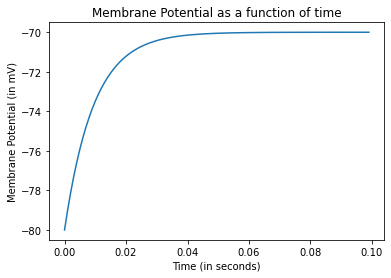

In [16]:
t_max = 0.1
dt = 0.001

v1,t = modified_euler(passive_membrane_potential, params['e_m'], t_max, dt, constant_current, params)
membrane_potential_mV = v1*1000 # voltage in millivolt
plt.plot(t,membrane_potential_mV) # time in seconds, and voltage in mV
plt.xlabel("Time (in seconds)")
plt.ylabel("Membrane Potential (in mV)")
plt.title("Membrane Potential as a function of time")

#### 3 (b) Consider a sinusoidal time-dependent current $I(t) = I_{0}.sin(2.\pi.\nu.t)$ with frequency $\nu$ and $I_{0}$ = 1 nA. Find and plot the numerical solutions for V (t) for $\nu$ = 1 Hz; 10 Hz and 30 Hz. Choose the respective time range corresponding to about ten signal periods. On each plot, superimpose the rescaled input $E_{m} + R_{m}I(t)$.


In [17]:
def sin_time_dep_current(params, t):
    return params['i0']*np.sin(2*np.pi*params['nu']*t)

In [18]:
def plot_membrane_potential_for_sinusoidal_current(t, rescaled_input, v):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
    axes.plot(t,rescaled_input*1000, label='Rescaled Input(mV)')
    axes.plot(t,v*1000, label='Membrane Potential(mV)')
    axes.set_xlabel('Time (in seconds)')
    axes.set_ylabel('Potential (in mV)')
    axes.set_title( 'Membrane Potential as a function of time for I(t) with ' + f'$nu = {nu_array[i]}$')
    axes.legend()
    axes.grid()

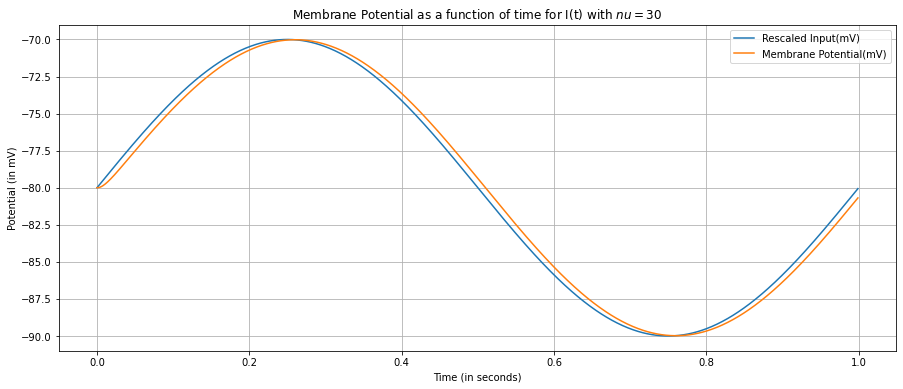

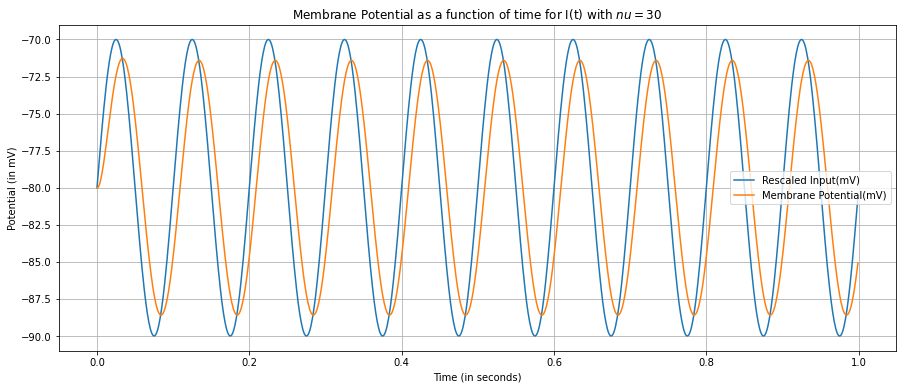

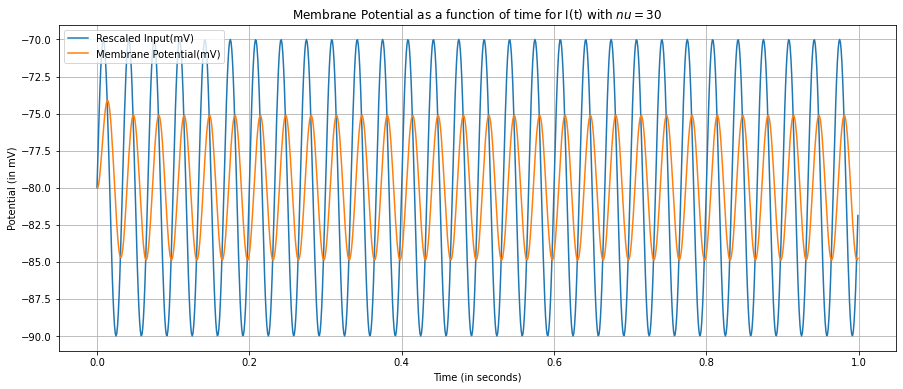

In [19]:
# time line
t_max = 1
dt = 0.001

nu_array = np.array([1,10,30])

for  nu in nu_array:
    params = { 
        'r_m':1e7, # in Ohm
        'e_m':-80e-3, # in Volt
        'tau_m':10e-3, # in seconds
        'i0': 1e-9, # in Ampere
        'nu' : nu
    }
    v_3b,t = modified_euler(passive_membrane_potential, params['e_m'], t_max, dt, sin_time_dep_current, params)
    rescaled_input = params['e_m'] + params['r_m'] * sin_time_dep_current(params, t)
    
    plot_membrane_potential_for_sinusoidal_current(t, rescaled_input, v_3b)



#### 3c After the initial condition has been forgotten, the voltage response approaches Asin($\omega$t - $\delta\phi$). Analyze how the voltage’s amplitude A and phase lag $\delta\phi$ depend on the driving frequency . To this end, plot the amplitude A of the resulting voltage oscillation versus frequency $\nu$ in the interval [1 Hz; 100 Hz]. Make also the equivalent plot for the phase differences.

In [20]:
def get_time_axis(freq, dt, no_of_osci):
    
    time_prd_1_osci = 1/freq
    divisions_per_osci = int(time_prd_1_osci/dt)
    t_max = (time_prd_1_osci) * no_of_osci 
    
    return time_prd_1_osci, divisions_per_osci, t_max

In [21]:
def amplitude_analytical(params, freq):
    z = 1 + (2 * np.pi * freq * params['tau_m'])**2
    return params['e_m'] + params['i0'] * params['r_m'] * np.sqrt(1/z) 

In [22]:
def phase_analytical(params, freq):
    z = 2 * np.pi * freq * params['tau_m']
    return np.arctan(z)

In [23]:
dt = 1e-4
params = { 
        'r_m':1e7, # in Ohm
        'e_m':-80e-3, # in Volt
        'tau_m':10e-3, # in seconds
        'i0': 1e-9, # in Ampere
        'nu' : 0
        }

In [24]:
nu_array = np.arange(1,100,1)
p = np.zeros(len(nu_array))
p_analy = np.zeros(len(nu_array))

A = np.zeros(len(nu_array))
A_analy = np.zeros(len(nu_array))

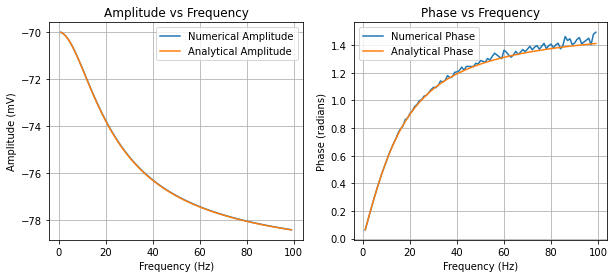

In [25]:
for  i in range(len(nu_array)):
    
    params['nu'] = nu_array[i]
    
    time_prd_1_osci, divisions_per_osci, t_max  = get_time_axis(nu_array[i], dt, 20)  # 20 oscillations
    
    
    v_3c,t = modified_euler(passive_membrane_potential, params['e_m'], t_max, dt, sin_time_dep_current, params)
    rescaled_input_c = params['e_m'] + params['r_m'] * sin_time_dep_current(params, t)
    
    # subarray with only the last oscillation, so as to forget the initial conditions
    v_3c_trunc = v_3c[-divisions_per_osci :] 
    rescaled_input_3c_trunc = rescaled_input_c[-divisions_per_osci : ]


    A[i] = np.max(v_3c_trunc)
    A_analy[i] = amplitude_analytical(params, nu_array[i])
    
    pos_diff = np.argmax(v_3c_trunc) - np.argmax(rescaled_input_3c_trunc)
    p[i] = (pos_diff/divisions_per_osci)*2*np.pi # phase difference in radians
    p_analy[i] = phase_analytical(params, nu_array[i])
    
    

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].plot(nu_array,A*1000, label='Numerical Amplitude')
axes[0].plot(nu_array,A_analy*1000, label='Analytical Amplitude')
axes[0].set_title("Amplitude vs Frequency")
axes[0].set_ylabel('Amplitude (mV)')
axes[0].set_xlabel('Frequency (Hz)')
axes[0].grid()
axes[0].legend()

axes[1].plot(nu_array,p, label='Numerical Phase')
axes[1].plot(nu_array,p_analy, label='Analytical Phase')
axes[1].set_title("Phase vs Frequency")
axes[1].set_ylabel('Phase (radians)')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].grid()
axes[1].legend()
